# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/renfeigao/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


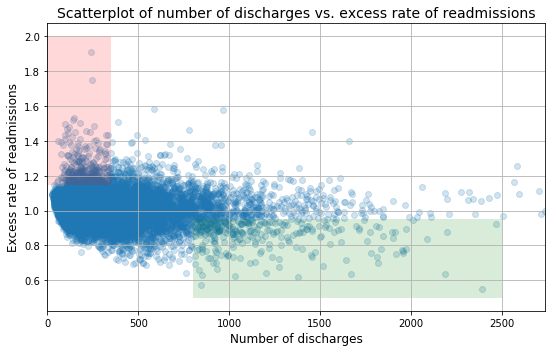

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. 
Do you agree with the above analysis and recommendations? Why or why not?

**Answer:
I disgree with the analysis above, because all the analysis are only based on graph and some mean value. We need statistical test to approve that.**

In [7]:
####remove not available values
hospital=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
hospital.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

# B. 
Provide support for your arguments and your own recommendations with a statistically sound analysis:   

## 1. Setup an appropriate hypothesis test.

**Hypothesis: Ho: There is no significant relation between hospital capacity and readmission rates H1: There is significant correlation between these two.**

## 2. Compute and report the observed significance value (or p-value).

In [8]:
hospital=hospital[hospital['Number of Readmissions'].notnull()]
hospital['Number of Discharges']=pd.to_numeric(hospital['Number of Discharges'])

In [9]:
hospital[['Number of Discharges','Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


In [10]:
hospital.shape

(11497, 12)

In [11]:
t=(-0.097398*((11497-2)/(1-(-0.097398)**2))**0.5)
import scipy.stats as stats
p_value1 = stats.t.sf(np.abs(t), (11497-2))*2 
print(p_value1)

1.2224686234119185e-25


**Based on p value, there is significant correlation between discharge and excess readmission**

## 3. Report statistical significance for $\alpha$ = .01.

**This has the same result, becuase the p value is really low, and less than 0.01**

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance fomula includes sample size, so the pvalue is influenced by sample size. If the sample size is huge, then p value will be very small, even though the correlation or difference is not so big.Practical significance generally assessed with some measure of effect size . I will set up a new hyphothesis to compare the two groups for their significance.The two groups will be readmission ration bigger than 1 and equal&less than 1 to compare their discharge difference significancy.

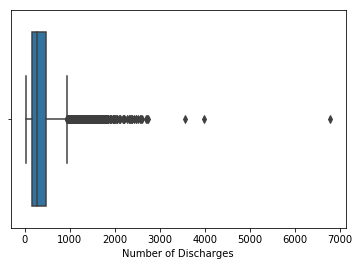

In [12]:
import seaborn as sns
ax = sns.boxplot(hospital['Number of Discharges'])

In [15]:
hospital1=hospital[hospital['Excess Readmission Ratio']<=1]
hospital2=hospital[hospital['Excess Readmission Ratio']>1]
import scipy.stats as ss
ss.ttest_ind(hospital1['Number of Discharges'],hospital2['Number of Discharges'])

Ttest_indResult(statistic=5.324171154200959, pvalue=1.0332472818989955e-07)

**Reject the H0, and we can conclude that there is significant difference for "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1.**

## 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


**Advantages: it is good to show the portion
Disadvantages: There is no obvious boundery for the excess readmission ratio. And the correlation between the readmission and discharge cannot be shown clearly**

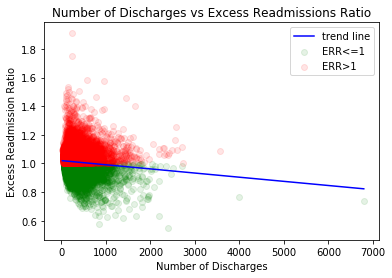

In [18]:
from scipy import stats  
x=hospital['Number of Discharges']
y=hospital['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
X=hospital['Number of Discharges'].sort_values()
y_trend=(-2.901e-05)*X + 1.02
plt.scatter(hospital1['Number of Discharges'], hospital1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hospital2['Number of Discharges'], hospital2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, y_trend, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()